In [1]:
# run python scripts containing all the functions
%run -i '0_paths_open_save.py'
%run -i '1_scraping_cleaning_merge.py'
%run -i '2_summary_stats_visualization_new.py'

# 1. check scraped data

In [ ]:
initial_panel = '201812'
tracking_panels = ['201812', '201912', '202001', '202003', '202004', '202009', '202010',
          '202011', '202012', '202101', '202102']

o = open_files(initial_panel=initial_panel, all_panels=tracking_panels)
app_details = o.open_initial_panel_with_its_tracking_panels()
A = app_detail_dicts(app_details, all_panels=tracking_panels)
A.get_a_glimpse()

# 2. check converted data

In [ ]:
# test
%run -i '1_scraping_cleaning_merge.py'
initial_panel='201907'
all_panels=['201907', '201908', '201909', '201912', '202001', '202003', '202004',
          '202009', '202010', '202011', '202012', '202101', '202102']
o = open_files(initial_panel=initial_panel,
                   all_panels=all_panels)
app_details = o.open_initial_panel_with_its_tracking_panels()
A = app_detail_dicts(d=app_details, all_panels=all_panels)
inter_df = A.format_cols()
print(inter_df['201907'].columns)


# 3. check whether the developer geocoding information is correct.

In [76]:
%run -i '0_paths_open_save.py'
%run -i '1_scraping_cleaning_merge.py'
%run -i '2_summary_stats_visualization_new.py'
initial_panel='201907'
o = open_files(initial_panel=initial_panel)
DF = o.open_panel_df(type='dev_index_geocoded')
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102']
consec_panels = ['202009', '202010', '202011', '202012', '202101', '202102']
new_class_obj = pre_processing(
                  df=DF,
                  df_index = 'dev_index_geocoded',
                  initial_panel=initial_panel,
                  all_panels=all_panels,
                  consec_panels=consec_panels)
print(new_class_obj.df.shape)
DF2 = new_class_obj.df[['developerAddress_201907', 'location', 'longitude', 'latitude']]
testdf1 = DF2.sample(100)
testdf1

(6442, 55)


,developerAddress_201907,location,longitude,latitude
developer,,,,
My Apps Studio,None,None,NaN,NaN
Pintogykas,None,None,NaN,NaN
International Dairy Queen®️,"8331 Norman Center Drive\nBloomington, MN 55437","(8331 Norman Center Drive, Minneapolis, MN 55437, (44.85294, -93.35164))",-93.35164,44.85294
"SNOW, Inc.","575 High Street,Suite 110 Palo Alto, CA 94301","(575 High Street, Palo Alto, CA 94301, (37.44357, -122.16224))",-122.16224,37.44357
Saucon IoT,None,None,NaN,NaN
...,...,...,...,...
Straight Talk,None,None,NaN,NaN
Maadinfo Services,2 allée des Ormeaux\n06130 Grasse\nFrance,"(2 Allée des Ormeaux, Grasse, 06130, (43.6564, 6.91355))",6.91355,43.65640
Usatine Media,"8529 Raintree Woods Drive\nFair Oaks Ranch, TX 78255","(8529 Raintree Woods Drive, Boerne, TX 78015, (29.73904, -98.65005))",-98.65005,29.73904


# 4. check whether the multiindex conversion is correct

In [ ]:
# test file
%run -i 'STEP0_paths_open_save.py'
%run -i 'STEP1_scraping_cleaning_merge.py'
%run -i 'STEP2_pre_processing.py'

o = open_files(initial_panel='201812')
DF = o.open_panel_df(type='dev_multiindex_geocoded')
all_panels = ['201812',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102']
consec_panels = ['202009', '202010', '202011', '202012', '202101', '202102']
new_class_obj = pre_processing(
                  df=testdf1,
                  df_index = 'dev_multiindex_geocoded',
                  initial_panel='201812',
                  all_panels=all_panels,
                  consec_panels=consec_panels)
new_class_obj.print_col_names(text='appId')

# 5. test code for deleting missing, imputing missing and deleting outliers

In [84]:
%run -i 'STEP0_paths_open_save.py'
%run -i 'STEP1_scraping_cleaning_merge.py'
%run -i 'STEP2_pre_processing.py'

initial_panel='201907'
o = open_files(initial_panel=initial_panel)
DF = o.open_panel_df(name='imputed_missing')
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102']
consec_panels = ['202009', '202010', '202011', '202012', '202101', '202102']
new_class_obj = pre_processing(
                  df=DF,
                  df_index = 'appid',
                  initial_panel=initial_panel,
                  all_panels=all_panels,
                  consec_panels=consec_panels)
print(new_class_obj.df.shape)

(10576, 344)


In [85]:
l1, dfl1 = new_class_obj.check_appids_with_at_least_one_missing(var='offersIAP',
                                                          consecutive=True)

In [77]:
d = new_class_obj.print_unique_values(cat_var='offersIAP', consecutive=True)

offersIAP_202009 contains 3 unique values
[True False None]
offersIAP_202010 contains 3 unique values
[True False None]
offersIAP_202011 contains 3 unique values
[True False None]
offersIAP_202012 contains 3 unique values
[True False None]
offersIAP_202101 contains 3 unique values
[True False None]
offersIAP_202102 contains 3 unique values
[True False None]


In [73]:
d = new_class_obj.replace_literal_true(cat_var='offersIAP', consecutive=False)

title_201907  \
jp.ne.ibis.ibispaintx.app                                 ibis Paint X                                         
com.canva.editor                                          Canva: Graphic Design, Video, Invite & Logo Maker    
com.doodle.master.draw.glow.art                           Doodle Master - Glow Art                             
com.appxstudio.smokearteffect                             Smoke Name Art - Smoky Effect Focus n Filter Maker   
com.adobe.spark.post                                      Adobe Spark Post: Graphic Design & Story Templates   
...                                                                                                      ...   
com.starstable.horses                                     Star Stable Horses                                   
com.cleverapps.candyriddles                               Candy Riddles: Free Match 3 Puzzle                   
com.budgestudios.googleplay.TransformersDisasterDash      Transformers Rescue Bots: Disaster Dash              
com.sparklingsocietysims.towncityparadisebuildingsimgame  Town City - Village Building Sim Paradise Game       
com.freshgames.escapealcatraz                             Escape Alcatraz                                      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [79]:
null_data, null_appids = new_class_obj.check_if_col_has_identical_value_except_for_missing(
    var='offersIAP', consecutive=True)

In [81]:
imputed_df = new_class_obj.impute_missing_using_adj_panels(
    var='offersIAP',
    consecutive=True,
    adj_panels=5,
    method='mode if none-missing are all the same')

In [10]:
new_class_obj.print_col_names()

title_201907
description_201907
summary_201907
minInstalls_201907
score_201907
ratings_201907
reviews_201907
histogram_201907
price_201907
free_201907
currency_201907
size_201907
developer_201907
genreId_201907
adSupported_201907
containsAds_201907
released_201907
updated_201907
comments_201907
developerId_201907
developerWebsite_201907
developerEmail_201907
developerAddress_201907
offersIAP_201907
appId_201907
contentRating_201907
title_201908
description_201908
summary_201908
minInstalls_201908
score_201908
ratings_201908
reviews_201908
histogram_201908
price_201908
free_201908
currency_201908
size_201908
developer_201908
genreId_201908
adSupported_201908
containsAds_201908
released_201908
updated_201908
comments_201908
developerId_201908
developerWebsite_201908
developerEmail_201908
developerAddress_201908
offersIAP_201908
appId_201908
contentRating_201908
title_201909
description_201909
summary_201909
minInstalls_201909
score_201909
ratings_201909
reviews_201909
histogram_201909
pr

Index(['title_201907', 'description_201907', 'summary_201907',
       'minInstalls_201907', 'score_201907', 'ratings_201907',
       'reviews_201907', 'histogram_201907', 'price_201907', 'free_201907',
       ...
       'developerWebsite_202102', 'developerAddress_202102', 'genreId_202102',
       'contentRating_202102', 'adSupported_202102', 'containsAds_202102',
       'released_202102', 'updated_202102', 'comments_202102', 'appId_202102'],
      dtype='object', length=344)

In [4]:
vars_to_count_missing = ['free', 'contentRating', 'genreId',
                          'containsAds', 'offersIAP',
                         'adSupported','containsAds', 'offersIAP']
missingdf = new_class_obj.count_missing(var_list=vars_to_count_missing)
print(missingdf)

                      count missing
free_201907           3            
free_201908           3            
free_201909           3            
free_201912           3            
free_202001           3            
free_202003           3            
free_202004           3            
free_202009           50           
free_202010           113          
free_202011           167          
free_202012           287          
free_202101           336          
free_202102           396          
contentRating_201907  3            
contentRating_201908  3            
contentRating_201909  3            
contentRating_201912  3            
contentRating_202001  3            
contentRating_202003  3            
contentRating_202004  3            
contentRating_202009  50           
contentRating_202010  113          
contentRating_202011  167          
contentRating_202012  287          
contentRating_202101  336          
contentRating_202102  396          
genreId_201907        25    

In [7]:
# test cell for imputing free
# missing before imputing
missing_df, missing_appids = new_class_obj.check_apps_with_consecutive_missing_panels(
    var='genreId',
    number_consec_panels_missing=2)
print(missing_df.shape)

number of apps with at least 2 consecutive missing panels for genreId are 339
out of 10576 apps.
(13, 339)


In [8]:
# test cell for imputing free
imputed_cols = new_class_obj.impute_missing_using_adj_panels(
            var='genreId',
            adj_panels=7,
            method='mode')
IMPUTED_DF = new_class_obj.replace_cols(new_cols=imputed_cols)
new_class_obj = pre_processing(
                  df=IMPUTED_DF,
                  df_index = 'appid',
                  initial_panel=initial_panel,
                  all_panels=all_panels,
                  consec_panels=consec_panels)

In [9]:
# check imputed cols
missing_df, missing_appids = new_class_obj.check_apps_with_consecutive_missing_panels(
    var='genreId',
    number_consec_panels_missing=2)
print(missing_df.shape)

number of apps with at least 2 consecutive missing panels for genreId are 1
out of 10576 apps.
(13, 1)


In [ ]:
cols, ps = new_class_obj.select_the_var(var='description')
print(cols, ps)

In [5]:
new_class_obj.print_col_names()

title_201907
description_201907
summary_201907
minInstalls_201907
score_201907
ratings_201907
reviews_201907
histogram_201907
price_201907
currency_201907
size_201907
developer_201907
released_201907
updated_201907
comments_201907
developerId_201907
developerWebsite_201907
developerEmail_201907
developerAddress_201907
appId_201907
adSupported_True_201907
containsAds_True_201907
free_True_201907
offersIAP_True_201907
contentRating_Adult_201907
contentRating_Everyone_201907
contentRating_Teen_201907
genreId_Entertainment_201907
genreId_Game_201907
genreId_Productivity_201907
title_201908
description_201908
summary_201908
minInstalls_201908
score_201908
ratings_201908
reviews_201908
histogram_201908
price_201908
currency_201908
size_201908
developer_201908
released_201908
updated_201908
comments_201908
developerId_201908
developerWebsite_201908
developerEmail_201908
developerAddress_201908
appId_201908
adSupported_True_201908
containsAds_True_201908
free_True_201908
offersIAP_True_201908


Index(['title_201907', 'description_201907', 'summary_201907',
       'minInstalls_201907', 'score_201907', 'ratings_201907',
       'reviews_201907', 'histogram_201907', 'price_201907', 'currency_201907',
       ...
       'adSupported_True_202102', 'containsAds_True_202102',
       'free_True_202102', 'offersIAP_True_202102',
       'contentRating_Adult_202102', 'contentRating_Everyone_202102',
       'contentRating_Teen_202102', 'genreId_Entertainment_202102',
       'genreId_Game_202102', 'genreId_Productivity_202102'],
      dtype='object', length=396)

In [174]:
missingdf = new_class_obj.count_missing(var_list=['minInstalls', 'score', 'reviews',
                                                  'ratings', 'price', 'description',
                                                  'released', 'updated', 'size', 'free_True', 'adSupported_True',
                                                  'containsAds_True', 'offersIAP_True', 'contentRating_Adult',
                                                  'contentRating_Everyone', 'contentRating_Teen',
                                                  'genreId_Entertainment', 'genreId_Game',
                                                  'genreId_Productivity'])
print(missingdf)

                               count missing
minInstalls_201907             25           
minInstalls_201908             25           
minInstalls_201909             25           
minInstalls_201912             25           
minInstalls_202001             25           
minInstalls_202003             25           
minInstalls_202004             25           
minInstalls_202009             50           
minInstalls_202010             113          
minInstalls_202011             167          
minInstalls_202012             287          
minInstalls_202101             336          
minInstalls_202102             396          
score_201907                   8            
score_201908                   8            
score_201909                   8            
score_201912                   8            
score_202001                   8            
score_202003                   8            
score_202004                   8            
score_202009                   54           
score_2020

In [3]:
missing_df, missing_appids = new_class_obj.check_apps_with_consecutive_missing_panels(
    var='size',
    number_consec_panels_missing=6)
print(missing_df.shape)

number of apps with at least 6 consecutive missing panels for size are 1849
out of 10576 apps.
(13, 1849)


In [175]:
# reproduce the method impute_missing_using_adj_panels
cols = []
for i in new_class_obj.df.columns:
    if 'size_' in i:
        cols.append(i)
test_df = new_class_obj.df[cols]
test_df = test_df.loc[['com.redberry.glitterlips',
         'zonek.design.paintbynumbers',
         'com.piupiuapps.hairstylesgirls']]
test_df

,size_201907,size_201908,size_201909,size_201912,size_202001,size_202003,size_202004,size_202009,size_202010,size_202011,size_202012,size_202101,size_202102
com.redberry.glitterlips,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,34.0,NaN,34.0
zonek.design.paintbynumbers,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,NaN,NaN,NaN
com.piupiuapps.hairstylesgirls,16.0,16.0,16.0,16.0,16.0,16.0,16.0,15.0,NaN,NaN,NaN,NaN,NaN


In [176]:
import functools
import copy
adj_panels = 7
method = 'mean'
df_list = []
for j in range(len(test_df.columns)):
    if j <= adj_panels//2 or j in [0, 1]:
        df = test_df.iloc[:, 0:adj_panels+1]
    elif j >= len(test_df.columns)-adj_panels//2-1:
        df = test_df.iloc[:, len(test_df.columns)-adj_panels-1:len(test_df.columns)]
    else:
        if adj_panels == 1:
            df = test_df.iloc[:, j-1:j+1]
        else:
            df = test_df.iloc[:, j-adj_panels//2:j+adj_panels//2+1]
    if method == 'mean':
        df[method] = df.mean(axis=1, skipna=True)
    elif method == 'mode':
        df[method] = df.mode(axis=1, numeric_only=False, dropna=True).iloc[:,0]
    elif method == 'previous':
        df[method] = df.iloc[:,0]
    else:
        df[method] = 0
    dfd = copy.deepcopy(df)
    for col in dfd.columns:
        dfd.loc[dfd[col].isnull(), col] = dfd[method]
    dfd = dfd[[test_df.columns[j]]]
    df_list.append(dfd)
imputed_df = functools.reduce(lambda a, b: a.join(b, how='inner'), df_list)
imputed_df

,size_201907,size_201908,size_201909,size_201912,size_202001,size_202003,size_202004,size_202009,size_202010,size_202011,size_202012,size_202101,size_202102
com.redberry.glitterlips,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.000000,33.000000,34.000000,33.285714,34.000000
zonek.design.paintbynumbers,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.000000,58.000000,58.000000,58.000000,58.000000
com.piupiuapps.hairstylesgirls,16.0,16.0,16.0,16.0,16.0,16.0,16.0,15.0,15.666667,15.666667,15.666667,15.666667,15.666667


In [29]:
missing_df, missing_appids = new_class_obj.check_apps_with_consecutive_missing_panels(
    var='updated',
    number_consec_panels_missing=1)
print(missing_df.shape)

number of apps with at least 1 consecutive missing panels for updated are 3
out of 10576 apps.
(13, 3)


# test block for NLP pipeline
Similar to geocode, this is an independent block, after imputation and deletion, you could simply merge
this new var cols to the original dataframe

In [45]:
%run -i 'STEP0_paths_open_save.py'
%run -i 'STEP3_NLP_pipeline.py'

initial_panel='201907'
o = open_files(initial_panel=initial_panel)
DF = o.open_panel_df(name='MERGED')
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102']
consec_panels = ['202009', '202010', '202011', '202012', '202101', '202102']
new_class_obj = nlp_pipeline(
                  df=DF,
                  text_col_name='summary',
                  initial_panel=initial_panel,
                  all_panels=all_panels,
                  consec_panels=consec_panels)

In [42]:
DF.loc['com.timeanddate.countdown', 'description_201907']
cols = ['summary' + '_' + item for item in all_panels]
DF.loc['com.timeanddate.countdown', cols]

summary_201907    Create live countdowns for any event in any time zone. Includes widgets.
summary_201908    Create live countdowns for any event in any time zone. Includes widgets.
summary_201909    Create live countdowns for any event in any time zone. Includes widgets.
summary_201912    Create live countdowns for any event in any time zone. Includes widgets.
summary_202001    Create live countdowns for any event in any time zone. Includes widgets.
summary_202003    Create live countdowns for any event in any time zone. Includes widgets.
summary_202004    Create live countdowns for any event in any time zone. Includes widgets.
summary_202009    Create live countdowns for any event in any time zone. Includes widgets.
summary_202010    Create live countdowns for any event in any time zone. Includes widgets.
summary_202011    Create live countdowns for any event in any time zone. Includes widgets.
summary_202012    Create live countdowns for any event in any time zone. Includes widgets.

In [46]:
single_text_col = new_class_obj.prepare_text_col(
    combine_panels=False
)

In [47]:
single_text_col.sample(10)

mobile.appcq8cCTCGnF                                               mobile event guide red robin events
com.cookapps.bubblecoco                exciting bubble shooting casual game ever aim shoot pop bubbles
io.faceapp                                                                      perfect selfie one tap
com.ehzstudios.weatheredgepanel                                  start day weather forecast edge panel
com.everlance                      free automatic car mileage tracker expense log taxes reimbursements
com.oxagile.speedtracker                               gps speedometer route tracker hud trip computer
com.zynga.wizardofoz                             spin win way yellow brick road free casino slot games
com.longyou.changwutuan.global     music land mobile game including social interaction singing dancing
com.publix.pharmacyonline             manage prescriptions anytime anywhere publix pharmacy mobile app
com.redemptiongames.sugar            decorate design bake village full sw

In [41]:
matrix, matrix_df = new_class_obj.tf_idf_transformation(
    combined_all_panels_into_single_text_col=False
)

<class 'scipy.sparse.csr.csr_matrix'>




  0%|          | 0/22 [00:00<?, ?it/s]

 14%|█▎        | 3/22 [00:00<00:00, 28.15it/s]

 27%|██▋       | 6/22 [00:00<00:00, 16.89it/s]

 36%|███▋      | 8/22 [00:00<00:01,  7.86it/s]

 45%|████▌     | 10/22 [00:03<00:05,  2.06it/s]

 50%|█████     | 11/22 [00:04<00:07,  1.38it/s]

 55%|█████▍    | 12/22 [00:06<00:10,  1.02s/it]

 59%|█████▉    | 13/22 [00:09<00:12,  1.37s/it]

 64%|██████▎   | 14/22 [00:12<00:13,  1.74s/it]

 68%|██████▊   | 15/22 [00:15<00:14,  2.11s/it]

 73%|███████▎  | 16/22 [00:18<00:14,  2.49s/it]

 77%|███████▋  | 17/22 [00:22<00:14,  2.90s/it]

 82%|████████▏ | 18/22 [00:26<00:12,  3.16s/it]

 86%|████████▋ | 19/22 [00:30<00:10,  3.38s/it]

 91%|█████████ | 20/22 [00:34<00:07,  3.67s/it]

 95%|█████████▌| 21/22 [00:39<00:03,  3.95s/it]

100%|██████████| 22/22 [00:44<00:00,  2.02s/it]


<class 'scipy.sparse.csr.csr_matrix'>
Number of components = 4 and explained variance = 0.025611085499907114
Number of components = 10 and explained variance = 0.052974678720316165
Number of components = 15 and explained variance = 0.07184921290720728
Number of components = 20 and explained variance = 0.08847679836418054
Number of components = 50 and explained variance = 0.1621267454318502
Number of components = 100 and explained variance = 0.25041291756621253
Number of components = 150 and explained variance = 0.31897336372230756
Number of components = 200 and explained variance = 0.3762197346416871
Number of components = 500 and explained variance = 0.6062092937262209
Number of components = 700 and explained variance = 0.7062455113326864
Number of components = 800 and explained variance = 0.7472615726091041
Number of components = 900 and explained variance = 0.7837825955535382
Number of components = 1000 and explained variance = 0.8164639117383639
Number of components = 1100 and expl

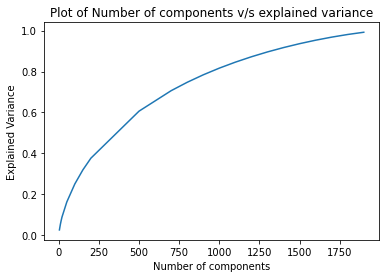

In [50]:
new_class_obj.truncate_svd_threshhold_plot(consecutive=False)


In [54]:
matrix_transformed, matrix_transformed_df = new_class_obj.truncate_svd(
    n_comp=1500, random_state=50, consecutive=False)

<class 'scipy.sparse.csr.csr_matrix'>
(10576, 1500)


In [56]:
y_kmeans, matrix_transformed_df = new_class_obj.kmeans_cluster(
    n_clusters=200,
    init='k-means++',
    random_state=50,
    n_comp=1500,
    consecutive=False)

<class 'scipy.sparse.csr.csr_matrix'>
(10576, 1500)
10576
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199}


In [58]:
new_df = new_class_obj.add_predicted_cluster_labels_to_df(
    n_clusters=200,
    init='k-means++',
    random_state=50,
    n_comp=1500,
    consecutive=False)

<class 'scipy.sparse.csr.csr_matrix'>
(10576, 1500)


# Test Block for Merging Dataframes Together

In [1]:
%run -i 'STEP0_paths_open_save.py'
%run -i 'STEP4_Regression.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102']
consec_panels = ['202009', '202010', '202011', '202012', '202101', '202102']

o = open_files(initial_panel=initial_panel)
DFA = o.open_panel_df(name='imputed_and_deleted_missing')
DFD = o.open_panel_df(name='dev_index_geocoded')
DFL = o.open_panel_df(name='predicted_text_cluster_labels')

new_class_obj = combine_dataframes(
                 initial_panel=initial_panel,
                 all_panels=all_panels,
                 consec_panels=consec_panels,
                 appid_imputed_and_deleted_missing_df=DFA,
                 dev_index_gecoded_df=DFD,
                 appid_text_cluster_labeled_df=DFL)

In [16]:
result_df = new_class_obj.combine_imputed_deleted_missing_with_text_labels()

In [49]:
result_df = new_class_obj.convert_to_dev_multiindex()

In [3]:
gdf, sdf = new_class_obj.eyeball_labels_by_group(label=8)

In [5]:
sdf.sample(5)

,,summary_202102,description_202102,predicted_labels
developer,appid,,,
"Oceanhouse Media, Inc.",com.oceanhouse_media.bookcatinthehat_app,"“It is fun to have fun, but you have to know how!”","Join the Cat in the Hat in this interactive book app as he stirs up some mischief while Dick and Sally's mother is out and about! Explore pictures, learn new vocabulary, and follow along with three fun ways to read! Will Dick and Sally get things back to normal before Mother returns?\r\n\r\nExplore The Cat in the Hat - Dr. Seuss:\r\n- ENCOURAGE literacy skills with highlighted narration\r\n- FOLLOW along with three fun ways to read!\r\n- LEARN new vocabulary with tappable words\r\n- TAP objects to hear their name read aloud \r\n\r\nDesigned for children ages 3-6\r\n\r\n\r\n------------------------------------------------------------------------\r\n\r\nWe'd Love To Hear From You!\r\n- Please share your thoughts in a review! Your experience matters to us.\r\n- Need tech support? Contact us at support@omapp.com\r\n- Say hello to us on FB! facebook.com/oceanhousemedia\r\n\r\nOfficial Dr. Seuss licensed App. Dr. Seuss Properties ™ & © 2010 Dr. Seuss Enterprises, L.P. All rights reserved.",8
MobiSystems,com.mobisystems.fonts,Add-on for OfficeSuite with the most used Microsoft fonts for office documents.,"<b>This is an add-on for OfficeSuite. Cannot be used with other apps or as a stand-alone app.</b>\r\n\r\nView your office documents as they are meant to be seen with the Microsoft Windows Font Compatibility pack. The pack includes the most commonly used fonts in Microsoft Office documents.\r\n\r\n • Arial (Regular, Bold, Italic and Bold Italic)\r\n • Arial Narrow WGL (Regular, Bold, Italic and Bold Italic)\r\n • Calibri (Regular, Bold, Italic and Bold Italic)\r\n • Comic Sans (Regular, Bold)\r\n • Cambria (Regular, Bold, Italic and Bold Italic)\r\n • Cambria Math (special character set)\r\n • Courier New (Regular, Bold, Italic and Bold Italic)\r\n • Georgia (Regular, Bold, Italic and Bold Italic)\r\n • Palace Script MT\r\n • Sorts (symbol character set)\r\n • Symbol (symbol character set)\r\n • Tahoma (Regular, Bold)\r\n • Times New Roman (Regular, Bold, Italic and Bold Italic)\r\n • Verdana (Regular, Bold, Italic and Bold Italic)\r\n • Webdings (symbol character set)\r\n • Wingdings 1 (symbol character set)\r\n • Wingdings 2 (symbol character set)\r\n • Wingdings 3 (symbol character set)\r\n\r\nYou'll also find a selection of specially curated open source fonts:\r\n\r\nA Bebedera, Ackermann, Acroscript, AlexBrush, Alfphabet, Ambrosia, Amburegul, Anke, Archicoco, Artaxerxes, Banana Brick, Beon, Bilbo, Binz, Brivido, Brush Lettering One, Certege, Climent Five, Comic Relief, Crimson, Cut-cut, Dancing Script, Didact Gothic, Dotrice, Douar Outline, Dynalight, Effects Eighty, Gabriola, Gamaliel, Garamond, Googily, Hobby-of-night, Impact, Interval, Kiri Font, Klaudia, Knots, Lato Regular, Lavoir, Libertinage, Logisoso, Lucon, Micross, Modern Antiqua, Old Standart, Open Sans, Orbitracer, Pacaya, Ponyo, Potion, Qwars Sans, Railway, Santa Barbara Streets, Strato, Sylfaen, Times Gothic, Titr, Toscuchet, Unique, Wachinanga\r\n\r\nThe font package is an optional add-on product compatible with OfficeSuite and OfficeSuite Pro.",8
Humongous Entertainment,com.tommo.nggpeff3,Freddi and Luther have arrived at the Founder’s day festival!,"Freddi Fish 3: The Case of the Stolen Conch Shell \r\n\r\nFreddi and Luther have arrived at the Founder’s day festival but the celebrations have come to a halt because Luther’s Uncle Blenny, the Grand Exalted Keeper of the Conch, stands accused for it’s disappearance. \r\n\r\nWho is the real culprit? Dive into another case with our favorite Junior Detectives are we solve the Case of the stolen Conch Shell. \r\n\r\nFEATURES: \r\n• Explore the underwater festival as Freddi and Luther in a title that changes at the start of each new game, giving a fresh new experience each time. \r\n• Every location is filled with wonders, a touch 

In [52]:
result_df[['summary_202102', 'description_202102', 'predicted_labels']].sample(10)

,,summary_202102,description_202102,predicted_labels
developer,appid,,,
Informed Publishing,com.ascendlearning.uglys.purchase,"With videos, electrical calculators, and built-in ebook, Ugly’s has your answer.","Featuring new menu designs the Ugly's Electrical References App 2020 has been updated to reflect changes to the 2020 National Electrical Code (NEC) and the 2020 Edition of our popular Ugly’s Electrical References book. The Ugly’s 2020 App offers the most pertinent, up-to-date digital information for electricians, including table change information, mathematical formulas; National Electrical Manufacturers Association (NEMA) wiring configurations; a conduit bending guide with videos, ampacity and conduit fill information, transformer and control circuit wiring diagrams, and conversion tables. \r\n\r\nThe 2020 Edition:\r\n\r\n•\tReflects changes to the 2020 NEC\r\n•\tNew look and updated menu icons\r\n•\tImproved deep linking between menus and content\r\n•\tFeatures expanded coverage of the following topics:\r\no\tJunction Box size calculations\r\no\tSelecting, testing, and using multimeters to measure voltage, resistance, and current\r\no\tSelecting, testing, and using a clamp-on ammeter to measure current\r\no\tSelecting, testing, and using a non-contact voltage tester \r\no\tOverview of important NEC code changes from 2014, 2107, and 2020\r\n\r\n\r\nThe only electrical reference app to include an ebook of the 2017 edition of Ugly’s Electrical References along with over a dozen calculators, interactive features and videos. Electricians and electrical professionals have used ‘Ugly’s Electrical References’ book as their on-the-job reference for over 35 years. This app will serve you even better in the field today.\r\n\r\nFEATURING\r\nCalculators and Interactive Features\r\n*Ohm’s Law Calculator\r\n*Voltage Drop\r\n*Ampacity Calculator\r\n*To Find: Amps, Watts, Horsepower, KVA\r\n*To Find: Inductance, Impedance, Reactance\r\n*Three-phase AC Motor Data: Starter, Breaker, Heater, Wire, and Conduit Size\r\n*Power Factor Correction\r\n*Full Load Current for Motors and Transformers\r\n*Locked-Rotor Current Calculator\r\n*Offset Bending Calculator\r\n*Conduit Fill Calculator \r\n*Conversions for Area, Length, Temperature, Time, Volume, and Weight\r\n*NEMA Wiring Configurations\r\n\r\n**Pinch & Zoom for improved readability\r\n**Video Tutorials of Conduit Bending\r\n\r\n**Search function helps you quickly find what you need to know\r\n\r\n**NEC Updater outlines and explains changes to the National Electrical Code©\r\n\r\n**Electrical Safety including definitions, boundaries, procedures, PPE guidance and life-saving first aid procedures\r\n\r\n**Blueprint symbol identifier\r\n\r\n**Bookmark your commonly used screens\r\n\r\n**High-definition images and interactive tables that can be zoomed in for detail\r\n\r\n**Works when you are offline and out of range\r\n\r\n**Great for electricians, students, engineers, contractors, maintenance workers, and military\r\n\r\n*********************************************\r\nInterested in a buying more than one copy of the Ugly’s Electrical Reference app for your commercially owned devices? Please email info[at]uglys[dot]net for details on volume purchases.\r\n\r\nPrivacy Policy - http://www.jblearning.com/privacy/\r\nTerms of Service - http://www.jblearning.com/use/\r\nSupport – http://www.uglys.net/appsupport \r\n\r\nThe Ugly’s Electrical Reference app is part of the popular Ugly’s Professional Reference® series which is an imprint of Jones & Bartlett Learning. National Electrical Code and NFPA 70 are registered trademarks of the National Fire Protection Agency and are not associated with Ugly’s Electrical References in any way.",194
HDM Dev Team,jp.snowlife01.android.rotationcontrolpro,Rotation Control App.\r\nControls the rotation of the screen.,"Can force a particular rotation on apps with fixed screen orientation.\r\nA simple design with functions that are easy to understand and use.\r\n\r\n\

In [27]:
for i in result_df.columns:
    print(i)

title_201907
description_201907
summary_201907
histogram_201907
currency_201907
comments_201907
developerId_201907
developerWebsite_201907
developerEmail_201907
developerAddress_201907
appId_201907
adSupported_True_201907
containsAds_True_201907
free_True_201907
offersIAP_True_201907
contentRating_Adult_201907
contentRating_Everyone_201907
contentRating_Teen_201907
genreId_Entertainment_201907
genreId_Game_201907
genreId_Productivity_201907
title_201908
description_201908
summary_201908
histogram_201908
currency_201908
developer_201908
comments_201908
developerId_201908
developerWebsite_201908
developerEmail_201908
developerAddress_201908
appId_201908
adSupported_True_201908
containsAds_True_201908
free_True_201908
offersIAP_True_201908
contentRating_Adult_201908
contentRating_Everyone_201908
contentRating_Teen_201908
genreId_Entertainment_201908
genreId_Game_201908
genreId_Productivity_201908
title_201909
description_201909
summary_201909
histogram_201909
currency_201909
developer_201

In [50]:
result_df.loc[['Toca Boca', 'SAND STUDIO', 'Nick Thissen', 'B-hyve', 'Billiard Ball Game'],
              ['summary_202102', 'description_202102', 'predicted_labels']]

summary_202102  \
developer          appid                                                                                                              
Toca Boca          com.tocaboca.tocakitchen2       The wildly popular Toca Kitchen is back!                                           
                   com.tocaboca.tocalifeworld      Create storylines, make unique characters & build your own exciting world          
                   com.tocaboca.tocahairsalon3     Our most popular app series returns, better than ever!                             
                   com.tocaboca.tocalab            Welcome to Toca Lab: Elements! Discover elements by experimenting with lab tools   
                   com.tocaboca.tocahospital       Experience the excitement of a busy medical center with Toca Life: Hospital!       
                   com.tocaboca.tocaneighborhood   Move into your new block                                                           
                   com.tocaboca.tocavacation       Make every day a vacation adventure!                                               
                   com.tocaboca.tocaoffice         Turn work into an adventure!                                                       
                   com.tocaboca.tocapets           Meet friends with paws & claws                                                     
                   com.tocaboca.tocastable         Welcome to a world of horses and adventure!                                        
                   com.tocaboca.tocaschool         Grab your backpack— it’s time for Toca Life: School!                               
                   com.tocaboca.tocatown           You rule in Toca Life: Town, a play world where anything and everyone is welcome   
                   com.tocaboca.tocakitchensushi   Let’s get cooking!                                                                 
                   com.tocaboca.tocaafterschool    Explore hobbies & play sport                                                       
                   com.tocaboca.tocalifefarm       Work and play the farmer's way!                                                    
                   com.tocaboca.tocamini           Let your imagination run wild in the colorful world of Toca Mini!                  
                   com.tocaboca.tocanature         Nature is magic. Toca Nature delivers that magic to your fingertips.               
                   com.tocaboca.tocacity           Welcome to Toca Life: City, a metropolis filled with everyday fun!                 
                   com.tocaboca.hairsalon2         Pay once & play forever! No in-app purchases. \r\n\r\nToca Hair Salon is back!     
                   com.tocaboca.hairsalonme        Give your friends and family a totally new look!                                   
                   com.tocaboca.tocaboo            BOO! \r\nDid I scare you!? My name is Bonnie and my family loves to spook!         
                   com.tocaboca.tocalabplants      Discover New Species!                                                              
                   com.tocaboca.tocamysteryhouse   Play with the strange                                                              
                   com.tocaboca.blocks             Toca Blocks is a unique world-building app.                                        
                   com.tocaboca.tocatrain          Explore as you drive the train                                                     
SAND STUDIO        com.sand.airdroid               Transfer files, SMS and access your phone from a computer remotely, for free!      
Nick Thissen       nl.nickthissen.iracingforum3    Comfortably browse the iRacing.com forums with this dedicated app!                 
B-hyve             com.orbit.orbitsmarthome        Companion app for Orbit bhyve sprinkler timer.                                     
                   com.orbit.orbitsmarthome.pro    B-hyve Pro App f

# Test Block for Regression

In [34]:
%run -i 'STEP0_paths_open_save.py'
%run -i 'STEP4_Regression.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102']
consec_panels = ['202009', '202010', '202011', '202012', '202101', '202102']

o = open_files(initial_panel=initial_panel)
DFA = o.open_panel_df(name='imputed_and_deleted_missing')
DFD = o.open_panel_df(name='dev_index_geocoded')
DFL = o.open_panel_df(name='predicted_text_cluster_labels')

new_class_obj = combine_dataframes(
                 initial_panel=initial_panel,
                 all_panels=all_panels,
                 consec_panels=consec_panels,
                 appid_imputed_and_deleted_missing_df=DFA,
                 dev_index_gecoded_df=DFD,
                 appid_text_cluster_labeled_df=DFL)

df = new_class_obj.combine_imputed_deleted_missing_with_text_labels()

reg_class_obj = regression_analysis(
    df=df,
    initial_panel=initial_panel,
    consec_panels=consec_panels)

In [35]:
new_df, count_df = reg_class_obj.peek_niche_index(
    var='predicted_labels')

dfniche = reg_class_obj.make_dummies_from_niche_index(
    var='predicted_labels',
    broad_type_label=8)

In [36]:
reg_class_obj.set_target_var(
    dep_var='minInstalls', cross_section=True, the_panel='202102')

reg_class_obj.set_independent_vars(
    ind_vars_list=['score', 'reviews',
             'ratings', 'price', 'niche_type'],
    cross_section=True,
    the_panel='202102')

summary_table = reg_class_obj.OLS_reg(
    dep_var='minInstalls',
    ind_vars_list=['score', 'reviews',
             'ratings', 'price', 'niche_type'],
    cross_section=True,
    the_panel='202102')

In [10]:
independent_vars = reg_class_obj.set_independent_vars(var_list=[
   'score', 'reviews', 'ratings', 'price'
], the_panel='202102')

In [ ]:
target = reg_class_obj.set_target_var(var='minInstalls', the_panel='202102')

In [61]:
df1 = reg_class_obj.replace_literal_true(cat_var='offersIAP')

In [2]:
ndf = reg_class_obj.print_unique_value_of_var_panel(single_var='offersIAP')

offersIAP_202009 contains 2 unique values
[True False]

offersIAP_202010 contains 2 unique values
[True False]

offersIAP_202011 contains 2 unique values
[True False]

offersIAP_202012 contains 2 unique values
[True False]

offersIAP_202101 contains 2 unique values
[True False]

offersIAP_202102 contains 2 unique values
[True False]



In [63]:
ndf = reg_class_obj.peek_at_missing(single_var='offersIAP')

In [25]:
r1 = reg_class_obj.create_new_dummies_from_cat_var(
    cat_var='free',
    time_invariant=False).create_new_dummies_from_cat_var(
    cat_var='containsAds',
    time_invariant=False).create_new_dummies_from_cat_var(
    cat_var='offersIAP',
    time_invariant=False).create_new_dummies_from_cat_var(
    cat_var='contentRating',
    time_invariant=True).create_new_dummies_from_cat_var(
    cat_var='genreId',
    time_invariant=True)


In [40]:
cols = ['offersIAP_'+i for i in r1.consec_panels]
d1 = r1.df.loc[r1.df['offersIAP_202009']=='True', cols]
print(d1.shape)

(9, 6)


In [28]:
r1.cat_var_count(cat_var='free')

       count_202009  count_202010  count_202011  count_202012  count_202101  \
True   5802          5803          5804          5806          5811           
False  2654          2653          2651          2649          2642           

       count_202102  
True   5776          
False  2632          


,count_202009,count_202010,count_202011,count_202012,count_202101,count_202102
True,5802,5803,5804,5806,5811,5776
False,2654,2653,2651,2649,2642,2632


In [5]:
dfgg, appgg= r1.df_that_changed_cat_var_over_time(cat_var='contentRating_everyone')

In [84]:
r1.print_unique_value_of_var_panel(the_var='free')

free_202009 contains 2 unique values
[True False]

free_202010 contains 2 unique values
[True False]

free_202011 contains 3 unique values
[True False None]

free_202012 contains 3 unique values
[True False None]

free_202101 contains 3 unique values
[True None False]

free_202102 contains 3 unique values
[True None False]



{'free_202009': array([True, False], dtype=object),
 'free_202010': array([True, False], dtype=object),
 'free_202011': array([True, False, None], dtype=object),
 'free_202012': array([True, False, None], dtype=object),
 'free_202101': array([True, None, False], dtype=object),
 'free_202102': array([True, None, False], dtype=object)}

In [33]:
r1.cat_var_count(cat_var='offersIAP')

       count_202009  count_202010  count_202011  count_202012  count_202101  \
True   4533          4550          4556          4553          4555           
False  3914          3906          3900          3903          3901           

       count_202102  
True   4565          
False  3891          


,count_202009,count_202010,count_202011,count_202012,count_202101,count_202102
True,4533,4550,4556,4553,4555,4565
False,3914,3906,3900,3903,3901,3891


In [24]:
dfgg, appgg= reg_class_obj.find_time_variant_rows(cat_var='genreId')

In [ ]:
# hypothesis 1
h1_independent_vars = ['predicted_labels', 'free_True', 'adSupported_True',
                       'containsAds_True', 'offersIAP_True', 'contentRating_Adult',
                       'contentRating_Teen', 'genreId_Entertainment', 'genreId_Game',
                       'genreId_Productivity', 'score', 'reviews', 'ratings', 'price',
                       'size', 'released']
